In [13]:
import os
import sys

sys.path.insert(0, os.path.join(os.path.abspath(""), "..", ".."))

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

from infovar.stats.ranking import prob_higher

## Definition of random variables

In [14]:
mus = np.array([1, 2, 0.1])
sigmas = np.array([1, 1, 5])

assert mus.size == sigmas.size

## Densities plot

In [15]:
n_sigmas_plot = 3
n_points = 1_000

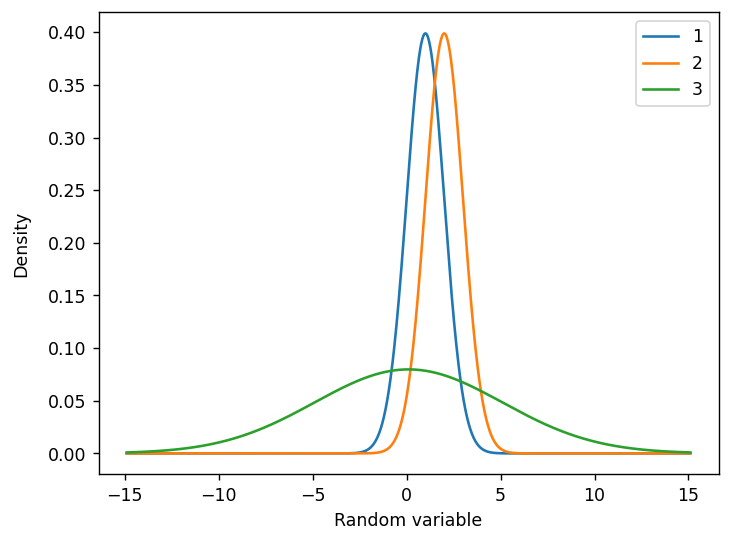

In [16]:
t = np.linspace(np.min(mus - n_sigmas_plot * sigmas), np.max(mus + n_sigmas_plot * sigmas), n_points)

plt.figure(dpi=125)

for i, (mu, sigma) in enumerate(zip(mus, sigmas), 1):
    pdf = norm.pdf(t, loc=mu, scale=sigma)
    plt.plot(t, pdf, label=f"{i}")

plt.xlabel("Random variable")
plt.ylabel("Density", labelpad=10)
plt.legend()

plt.show()

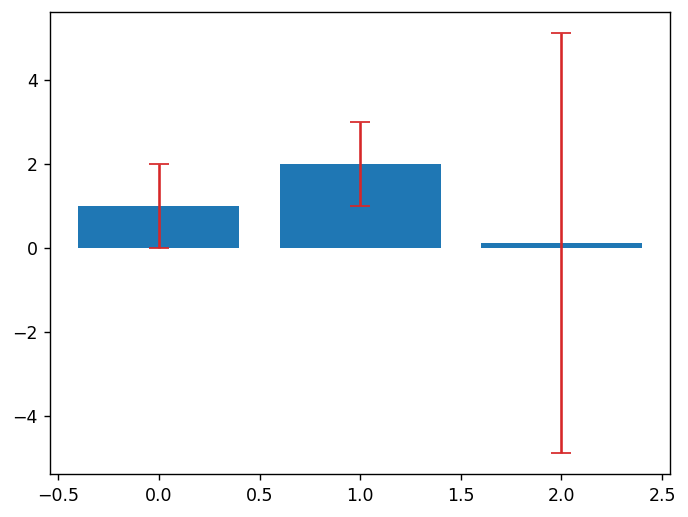

In [17]:
xticks = np.arange(mus.size)

plt.figure(dpi=125)

plt.bar(xticks, mus)
plt.errorbar(xticks, mus, sigmas, capsize=6, color="tab:red", fmt="none")

plt.show()

## Probabilities of being first

### Numerical integration method

#### Two variables case

If $X$ and $Y$ are two normal distributions of possibly distinct means and variances, then the probability that a sample of $X$ is greater than a sample of $Y$ is equal to the probability that $Z = X-Y$ is positive.

Under the assumption of normality for $X$ and $Y$, we have : $Z \hookrightarrow \cal{N}(\mu_x - \mu_y, \sigma_x^2 + \sigma_y^2)$

We can then calculate $\mathbb{P}(Z > 0) = 1-\Phi(Z, 0)$.

#### $n$ variables case

This needs numeric integration. Let $f_i$ be the PDF of $X_i$ and $\Phi_i$ be its CDF. Conditionally on $X_1=t$, the chance that $X_1>X_i, \forall i=2,\dots,n$ is the product of the individual chances (by independence):

$$ \mathbb{P}(t \geq X_i, \forall i=2,\dots,n) = \Phi_2(t)\cdots\Phi_n(t) $$

Integrating over all values of $t$ gives:

$$ \mathbb{P}(X_1 \geq X_i, \forall i=2,\dots,n) =\int_{+\infty}^{+\infty} f_1(t)\,\Phi_2(t)\cdots\Phi_n(t)\,dt $$

More generally, the probability that a sample drawn from $X_j$ is greater than any other samples is:

$$ \mathbb{P}(X_j \geq X_i,\,\forall i=1,\dots,n,\,i\neq j) =\int_{+\infty}^{+\infty} f_j(t)\,\prod_{\substack{i=1\\ i\neq j}}^n\Phi_i(t)\,dt $$

This formula ... TODO

In [18]:
probs_num = prob_higher(mus, sigmas, approx=False)

### Simulation

In [19]:
n_samples = 100_000

In [20]:
samples = np.random.normal(mus, sigmas, size=(n_samples, mus.size))
indices = np.argmax(samples, axis=1)

probs_exp = []
for i in range(mus.size):
    p = np.mean(indices == i)
    probs_exp.append(p)

### Bar plot

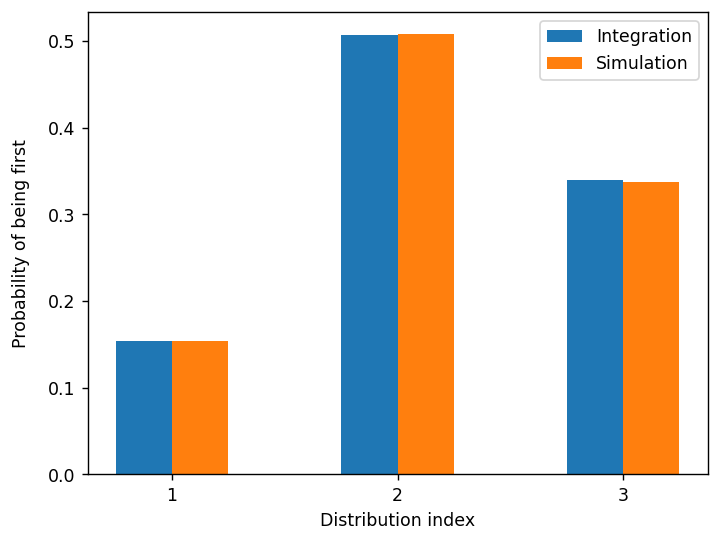

In [21]:
plt.figure(dpi=125)

w = 0.25
xticks = np.arange(mus.size) + 1
plt.bar(xticks + 0*w , probs_num, width=0.25, label="Integration")
plt.bar(xticks + 1*w , probs_exp, width=0.25, label="Simulation")
plt.xticks(xticks + 0.5*w, xticks)

plt.xlabel("Distribution index")
plt.ylabel("Probability of being first", labelpad=10)
plt.legend()

plt.show()